In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import seaborn as sns#visualization
import matplotlib.pyplot as plt
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


# Loading Data

In [2]:
file_path = '../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv'
data = pd.read_csv(file_path)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
print(data.describe())
print('\nThe features are: \n',data.columns.tolist())

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

The features are: 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


## Checking unique values in each attribute

In [4]:
for feature in data.columns.tolist():
    print('The unique value in',feature, data[feature].unique())

The unique value in customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
The unique value in gender ['Female' 'Male']
The unique value in SeniorCitizen [0 1]
The unique value in Partner ['Yes' 'No']
The unique value in Dependents ['No' 'Yes']
The unique value in tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
The unique value in PhoneService ['No' 'Yes']
The unique value in MultipleLines ['No phone service' 'No' 'Yes']
The unique value in InternetService ['DSL' 'Fiber optic' 'No']
The unique value in OnlineSecurity ['No' 'Yes' 'No internet service']
The unique value in OnlineBackup ['Yes' 'No' 'No internet service']
The unique value in DeviceProtection ['No' 'Yes' 'No internet service']
The unique value in TechSupport ['No' 'Yes' 'No internet service']
The unique 

## Checking Missing values

In [5]:
for feature in data.columns.tolist():
    print('Total number of missing values in', feature, data[feature].isnull().sum())

Total number of missing values in customerID 0
Total number of missing values in gender 0
Total number of missing values in SeniorCitizen 0
Total number of missing values in Partner 0
Total number of missing values in Dependents 0
Total number of missing values in tenure 0
Total number of missing values in PhoneService 0
Total number of missing values in MultipleLines 0
Total number of missing values in InternetService 0
Total number of missing values in OnlineSecurity 0
Total number of missing values in OnlineBackup 0
Total number of missing values in DeviceProtection 0
Total number of missing values in TechSupport 0
Total number of missing values in StreamingTV 0
Total number of missing values in StreamingMovies 0
Total number of missing values in Contract 0
Total number of missing values in PaperlessBilling 0
Total number of missing values in PaymentMethod 0
Total number of missing values in MonthlyCharges 0
Total number of missing values in TotalCharges 0
Total number of missing va

# Data Manipulation

> Noticing that the values in some columns are not tidy enough, such as columns like MultipleLines, OnlineSecurity, OnlineBackup,  DeviceProtection and etc. 'No internet wervice' means that they don't have that knid of service. So, I replace that value with 'No'. Also, in TotalCharges column, the type of data is string, not numeric. So, I convert the type of TotalCharges into float before analysing.

In [6]:
# change the type of TotalCharges 
data['TotalCharges'] = data["TotalCharges"].replace(" ",np.nan)

#select data without missing values
data = data[data["TotalCharges"].notnull()]
data = data.reset_index()[data.columns]

data["TotalCharges"] = data["TotalCharges"].astype(float)


change_col = ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
for col in change_col:
    data[col].replace('No internet service','No',inplace = True)

data['MultipleLines'].replace('No phone service','No', inplace = True)
#customer id col
Id_col     = ['customerID']
#Target column"
target_col = ["Churn"]
#categorical columns
cat_cols   = data.nunique()[data.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
#numerical columns
num_cols   = [x for x in data.columns if x not in cat_cols + target_col + Id_col]
#Binary columns with 2 values
bin_cols   = data.nunique()[data.nunique() == 2].keys().tolist()
#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]


In [7]:
data['TotalCharges'].isnull().sum()

0

# Data Visulization

In [8]:
data['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

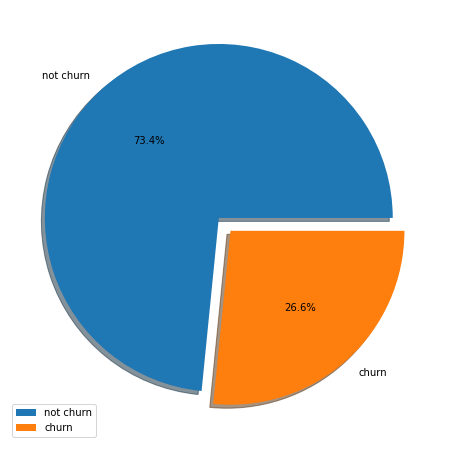

In [9]:
labels = ['not churn','churn']
plt.figure(figsize=(8,8))
plt.pie(data['Churn'].value_counts(),labels = labels, autopct = '%1.1f%%',shadow = True,explode = (0.05,0.05))
plt.legend()

> The classes here are imbalanced, and the ratio of not churn to churn instances is 2.76.

## Customer analysis

<Figure size 720x432 with 0 Axes>

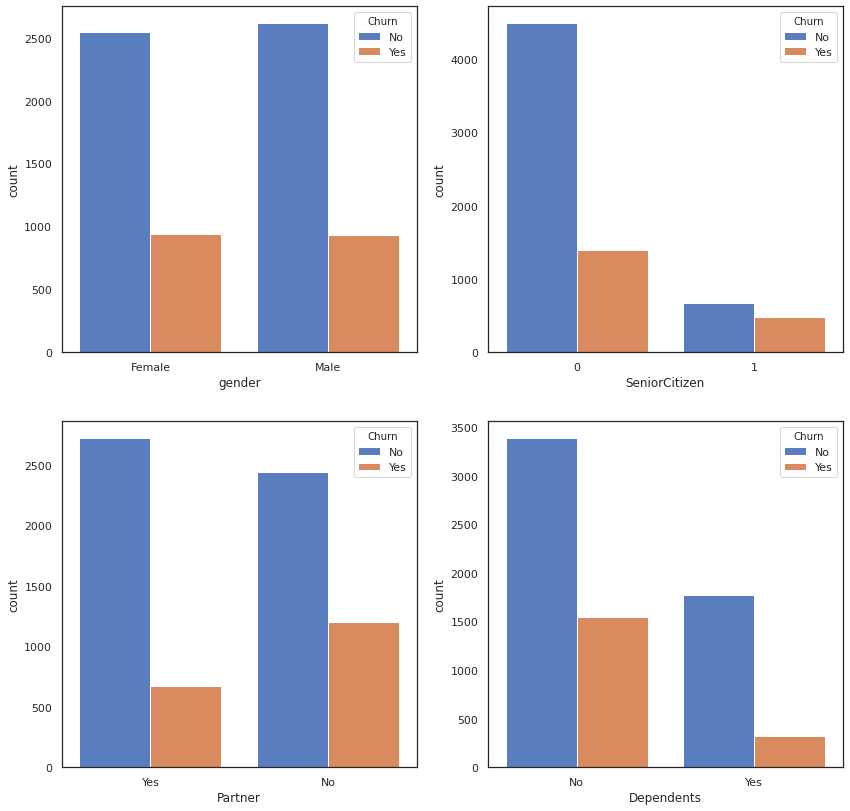

In [10]:
sns.set(style="white", palette="muted", color_codes=True)
plt.figure(figsize=(10,6))
f, axes = plt.subplots(2, 2, figsize=(14, 14))
sns.countplot(x = 'gender',hue = 'Churn', data = data, ax=axes[0,0])
sns.countplot(x = 'SeniorCitizen',hue = 'Churn', data = data, ax=axes[0,1])
sns.countplot(x = 'Partner',hue = 'Churn', data = data, ax=axes[1,0])
sns.countplot(x = 'Dependents',hue = 'Churn', data = data, ax=axes[1,1])

## Service Analysis

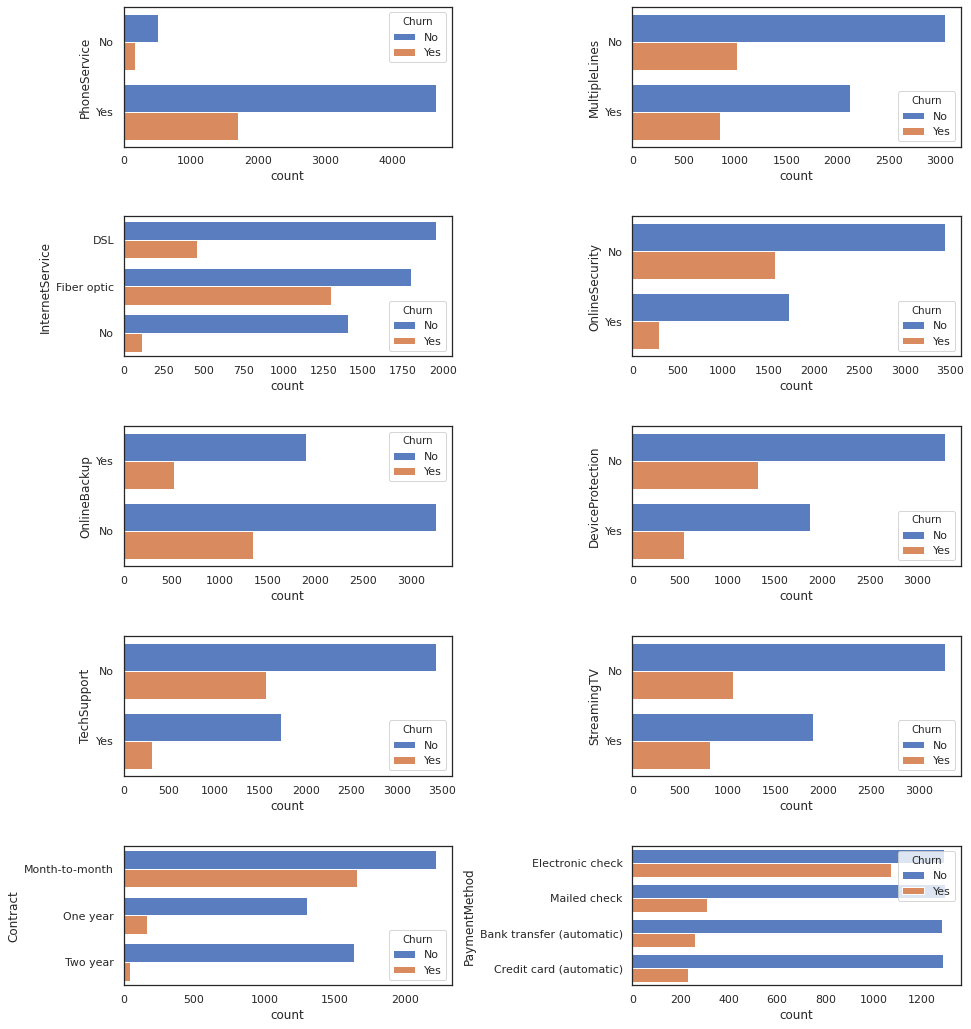

In [11]:
f, axes = plt.subplots(5, 2, figsize=(15, 18))
plt.subplots_adjust(wspace =0.55, hspace =0.5)
sns.countplot(y = 'PhoneService',hue = 'Churn', data = data, ax=axes[0,0]) 
sns.countplot(y = 'MultipleLines',hue = 'Churn', data = data, ax=axes[0,1])
sns.countplot(y = 'InternetService',hue = 'Churn', data = data, ax=axes[1,0])
sns.countplot(y = 'OnlineSecurity',hue = 'Churn', data = data, ax=axes[1,1])
sns.countplot(y = 'OnlineBackup',hue = 'Churn', data = data, ax=axes[2,0])
sns.countplot(y = 'DeviceProtection',hue = 'Churn', data = data, ax=axes[2,1])
sns.countplot(y = 'TechSupport',hue = 'Churn', data = data, ax=axes[3,0])
sns.countplot(y = 'StreamingTV',hue = 'Churn', data = data, ax=axes[3,1])
sns.countplot(y = 'Contract',hue = 'Churn', data = data, ax=axes[4,0])  
sns.countplot(y = 'PaymentMethod',hue = 'Churn', data = data, ax=axes[4,1])

## Categorical Data Processing

In [12]:
#Label encoding Binary columns
label_encoder = LabelEncoder()
for i in bin_cols :
    data[i] = label_encoder.fit_transform(data[i])
    
#Duplicating columns for multi value columns
data = pd.get_dummies(data = data,columns = multi_cols )


In [13]:
#Scaling Numerical columns
std = StandardScaler()
scaled = std.fit_transform(data[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

In [14]:
#dropping original values merging scaled values for numerical columns
data_copy = data.copy()
data = data.drop(columns = num_cols,axis = 1)
data = data.merge(scaled,left_index=True,right_index=True,how = "left")

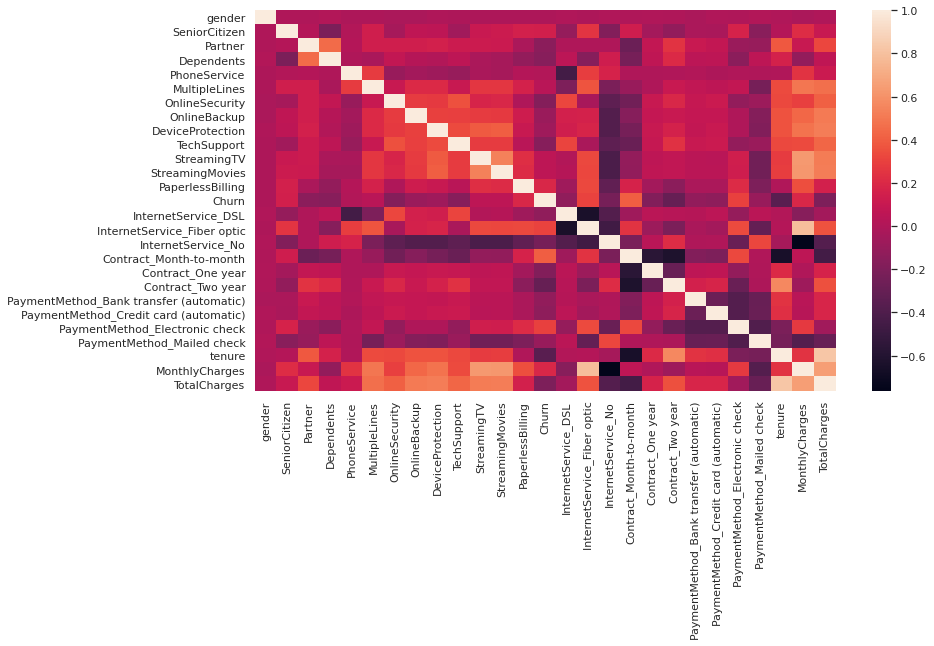

In [15]:
plt.figure(figsize = (13,7))

#get the correlation coefficient of each pair of attributes
correlation = data.corr()
sns.heatmap(data = correlation)

In [16]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(data,test_size = .30 ,random_state = 1)


## Oversampling using SMOTE

In [17]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
cols    = [i for i in data.columns if i not in Id_col+target_col]
smote_X = data[cols]
smote_Y = data[target_col]
os = SMOTE(random_state=1)
#Split train and test data
smote_train_X,smote_test_X,smote_train_Y,smote_test_Y = train_test_split(smote_X,smote_Y,test_size = .30 ,random_state = 1)
os_smote_X,os_smote_Y = os.fit_sample(smote_train_X,smote_train_Y)
os_smote_X = pd.DataFrame(data = os_smote_X,columns=cols)
os_smote_Y = pd.DataFrame(data = os_smote_Y,columns=target_col)

print("length of oversampled data is ",len(os_smote_X))

Using TensorFlow backend.


length of oversampled data is  7216


## Recursive Feature Elimination

In [18]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_smote_X, os_smote_Y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)
idc_rfe = pd.DataFrame({"rfe_support" :rfe.support_,
                       "columns" : [i for i in data.columns if i not in Id_col + target_col],
                       "ranking" : rfe.ranking_,
                      })
cols = idc_rfe[idc_rfe["rfe_support"] == True]["columns"].tolist()

#separating train and test data
train_rf_X = os_smote_X[cols]
train_rf_Y = os_smote_Y
test_rf_X  = test[cols]
test_rf_Y  = test[target_col]


[False False False False  True  True  True  True  True  True  True  True
 False False  True  True  True  True  True  True  True  True  True  True
  True  True]
[5 4 6 3 1 1 1 1 1 1 1 1 7 2 1 1 1 1 1 1 1 1 1 1 1 1]


In [19]:
import statsmodels.api as sm
logit_model=sm.Logit(train_rf_Y,train_rf_X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.456900
         Iterations 7
                                     Results: Logit
Model:                      Logit                    Pseudo R-squared:         0.341    
Dependent Variable:         Churn                    AIC:                      6633.9749
Date:                       2020-04-21 19:26         BIC:                      6771.6560
No. Observations:           7216                     Log-Likelihood:           -3297.0  
Df Model:                   19                       LL-Null:                  -5001.8  
Df Residuals:               7196                     LLR p-value:              0.0000   
Converged:                  1.0000                   Scale:                    1.0000   
No. Iterations:             7.0000                                                      
----------------------------------------------------------------------------------------
                                         Coef

In [20]:
cols = idc_rfe[idc_rfe["rfe_support"] == True]["columns"].tolist()
drop_cols = ['PhoneService','MultipleLines','Contract_Two year','MonthlyCharges']
cols = [i for i in cols if i not in drop_cols]
train_rf_X1 = os_smote_X[cols]
train_rf_Y1 = os_smote_Y
test_rf_X1  = test[cols]
test_rf_Y1 = test[target_col]
logit_model=sm.Logit(train_rf_Y1,train_rf_X1)
result1=logit_model.fit()
print(result1.summary2())

Optimization terminated successfully.
         Current function value: 0.457585
         Iterations 7
                                     Results: Logit
Model:                      Logit                    Pseudo R-squared:         0.340    
Dependent Variable:         Churn                    AIC:                      6635.8736
Date:                       2020-04-21 19:26         BIC:                      6746.0185
No. Observations:           7216                     Log-Likelihood:           -3301.9  
Df Model:                   15                       LL-Null:                  -5001.8  
Df Residuals:               7200                     LLR p-value:              0.0000   
Converged:                  1.0000                   Scale:                    1.0000   
No. Iterations:             7.0000                                                      
----------------------------------------------------------------------------------------
                                         Coef

## Logistic Regression Model Fitting

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import mean_absolute_error
X_train, X_test, y_train, y_test = train_test_split(os_smote_X, os_smote_Y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.81


In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[826 242]
 [168 929]]


In [24]:
from sklearn.metrics import classification_report
logit_report = classification_report(y_test, y_pred)

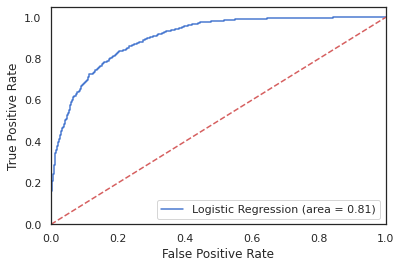

In [25]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

## KNN CLassifier

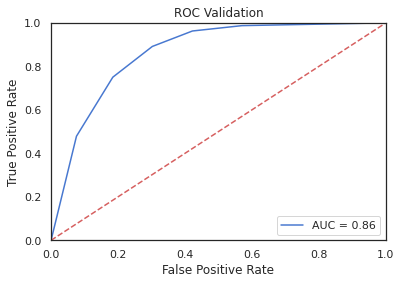

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,auc

knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

knn_prob_y_predict = knn.predict_proba(X_test)
y_predict = knn_prob_y_predict[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
roc_auc = auc(fpr, tpr)
plt.title('ROC Validation')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
knn_report = classification_report(y_test, y_pred)


## Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier(n_estimators = 100, max_depth=4, random_state=1)
forest_model.fit(X_train, y_train)
melb_preds = forest_model.predict(X_test)


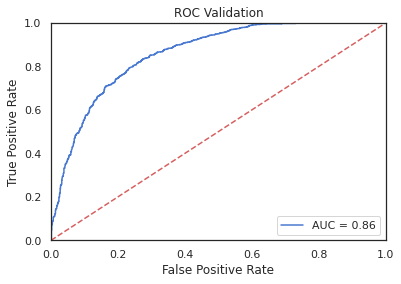

In [28]:
from sklearn.metrics import roc_curve, auc
clf = RandomForestClassifier(n_estimators = 100, max_depth=4,random_state=1)
clf.fit(X_train, y_train)
r = clf.score(X_test,y_test)
clf.estimators_

prob_y_predict = clf.predict_proba(X_test)#给出带有概率值的结果，每个点所有label的概率和为1
y_predict = prob_y_predict[:, 1]
y_pred = clf.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
roc_auc = auc(fpr, tpr)
plt.title('ROC Validation')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
rf_report = classification_report(y_test, y_pred)

In [29]:
forest_model.feature_importances_

array([0.00068263, 0.00031129, 0.00910961, 0.01936431, 0.00133013,
       0.00218737, 0.03418599, 0.0056779 , 0.00120663, 0.02465742,
       0.00343831, 0.00592523, 0.0057698 , 0.01847365, 0.09117821,
       0.05328796, 0.2140626 , 0.03240143, 0.1530158 , 0.00462301,
       0.00117206, 0.0590864 , 0.00466294, 0.15983815, 0.05293069,
       0.04142048])

In [30]:
clf.estimators_[99]


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=106512539, splitter='best')

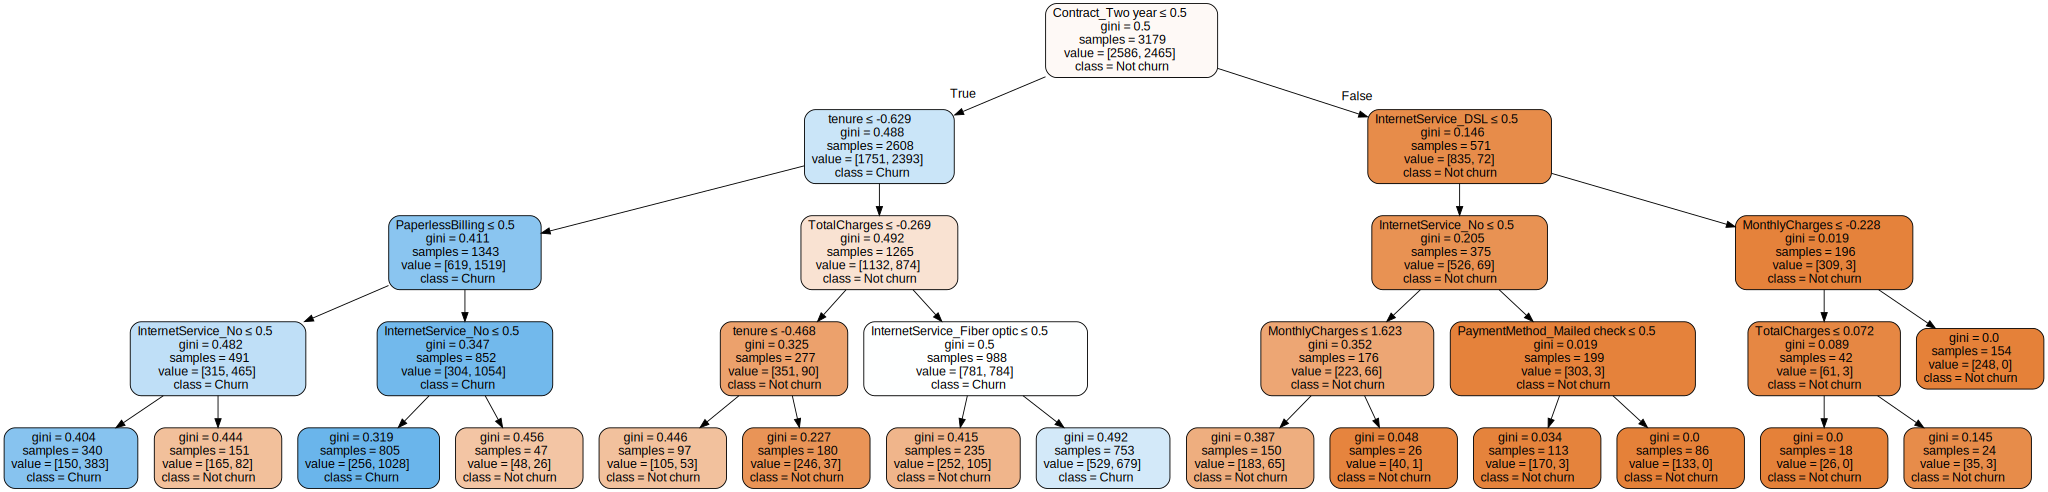

In [31]:
from sklearn.ensemble import RandomForestClassifier
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz

data = export_graphviz(clf.estimators_[99],out_file=None,feature_names=X_train.columns,
                       class_names=["Not churn","Churn"], 
                       filled=True, rounded=True,  
                       max_depth=4,
                       special_characters=True)
graph = graphviz.Source(data)
graph

## Support Vector Machine

In [32]:
from sklearn import svm
#Create a svm Classifier
svm_clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
svm_clf.fit(X_train, y_train)

#Predict the response for test dataset
svm_pred = svm_clf.predict(X_test)

In [33]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, svm_pred))
print("Precision:",metrics.precision_score(y_test, svm_pred))
svm_report = classification_report(y_test, svm_pred)


Accuracy: 0.8170900692840647
Precision: 0.7998289136013687


In [34]:
print('logistic report:\n',logit_report)
print('========================================================')
print('KNN classifier report:\n',knn_report)
print('========================================================')
print('Random Forest report:\n',rf_report)
print('========================================================')
print('Support Vector Machine report:\n',svm_report)

logistic report:
               precision    recall  f1-score   support

           0       0.83      0.77      0.80      1068
           1       0.79      0.85      0.82      1097

    accuracy                           0.81      2165
   macro avg       0.81      0.81      0.81      2165
weighted avg       0.81      0.81      0.81      2165

KNN classifier report:
               precision    recall  f1-score   support

           0       0.86      0.70      0.77      1068
           1       0.75      0.89      0.82      1097

    accuracy                           0.80      2165
   macro avg       0.81      0.79      0.79      2165
weighted avg       0.81      0.80      0.79      2165

Random Forest report:
               precision    recall  f1-score   support

           0       0.81      0.71      0.76      1068
           1       0.75      0.84      0.79      1097

    accuracy                           0.78      2165
   macro avg       0.78      0.78      0.78      2165
weighted 